**[Deep Learning Course Home Page](https://www.kaggle.com/learn/deep-learning)**

---


# Exercise Introduction

The cameraman who shot our deep learning videos mentioned a problem that we can solve with deep learning.  

He offers a service that scans photographs to store them digitally.  He uses a machine that quickly scans many photos. But depending on the orientation of the original photo, many images are digitized sideways.  He fixes these manually, looking at each photo to determine which ones to rotate.

In this exercise, you will build a model that distinguishes which photos are sideways and which are upright, so an app could automatically rotate each image if necessary.

If you were going to sell this service commercially, you might use a large dataset to train the model. But you'll have great success with even a small dataset.  You'll work with a small dataset of dog pictures, half of which are rotated sideways.

Specifying and compiling the model look the same as in the example you've seen. But you'll need to make some changes to fit the model.



# 1) Specify the Model


In [24]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
resnet_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Indicate whether the first layer should be trained/changed or not.
my_new_model.layers[0].trainable = False



# 2) Compile the Model

You now compile the model with the following line.  Run this cell.

In [25]:
my_new_model.compile(optimizer='sgd', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

That ran nearly instantaneously.  Deep learning models have a reputation for being computationally demanding.  Why did that run so quickly?

After thinking about this, check your answer by uncommenting the cell below.

# 3) Review the Compile Step
You provided three arguments in the compile step.  
- optimizer
- loss
- metrics

Which arguments could affect the accuracy of the predictions that come out of the model?  After you have your answer, run the cell below to see the solution.

# 4) Fit Model

**Your training data is in the directory `images/train`. The validation data is in `images/val`**. Use that information when setting up `train_generator` and `validation_generator`.

You have 220 images of training data and 217 of validation data.  For the training generator, we set a batch size of 10. Figure out the appropriate value of `steps_per_epoch` in your `fit_generator` call.


In [26]:
!ls images/train/upright

dog.11102.jpg dog.8043.jpg  dog.8344.jpg  dog.8666.jpg  dog.8970.jpg
dog.11123.jpg dog.8048.jpg  dog.8356.jpg  dog.8673.jpg  dog.8976.jpg
dog.11130.jpg dog.8058.jpg  dog.8370.jpg  dog.8697.jpg  dog.8988.jpg
dog.11144.jpg dog.8061.jpg  dog.8391.jpg  dog.8712.jpg  dog.9060.jpg
dog.11168.jpg dog.8093.jpg  dog.8401.jpg  dog.8728.jpg  dog.9116.jpg
dog.7056.jpg  dog.8107.jpg  dog.8422.jpg  dog.8743.jpg  dog.9256.jpg
dog.7267.jpg  dog.8121.jpg  dog.8436.jpg  dog.876.jpg   dog.9316.jpg
dog.7466.jpg  dog.8130.jpg  dog.8448.jpg  dog.8773.jpg  dog.9369.jpg
dog.756.jpg   dog.8147.jpg  dog.8466.jpg  dog.8783.jpg  dog.9465.jpg
dog.7605.jpg  dog.8155.jpg  dog.8487.jpg  dog.880.jpg   dog.9586.jpg
dog.7632.jpg  dog.8156.jpg  dog.8504.jpg  dog.8811.jpg  dog.962.jpg
dog.7663.jpg  dog.818.jpg   dog.8516.jpg  dog.8824.jpg  dog.9628.jpg
dog.769.jpg   dog.8194.jpg  dog.852.jpg   dog.8826.jpg  dog.9640.jpg
dog.7696.jpg  dog.821.jpg   dog.8530.jpg  dog.8852.jpg  dog.9655.jpg
dog.7766.jpg  dog.8221.jpg  dog.854

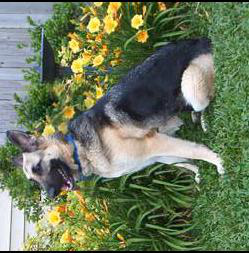

In [27]:
from tensorflow.keras.preprocessing.image import load_img
img = load_img('images/train/sideways/dog.11103.jpg')
img

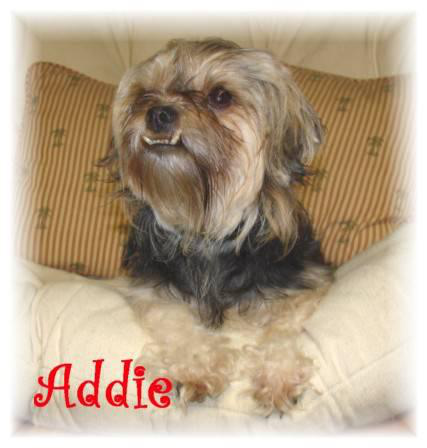

In [28]:
from tensorflow.keras.preprocessing.image import load_img
img = load_img('images/train/upright/dog.11102.jpg')
img

In [29]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

image_size = 224
data_generator = ImageDataGenerator(preprocess_input)

train_generator = data_generator.flow_from_directory(
                                        directory='images/train',
                                        target_size=(image_size, image_size),
                                        batch_size=10,
                                        class_mode='categorical')



validation_generator = data_generator.flow_from_directory(
                                        directory='images/val',
                                        target_size=(image_size, image_size),
                                        class_mode='categorical')



# fit_stats below saves some statistics describing how model fitting went
# the key role of the following line is how it changes my_new_model by fitting to data
fit_stats = my_new_model.fit_generator(train_generator,
                                       epochs=2,
                                       steps_per_epoch=22,
                                       validation_data=validation_generator,
                                       validation_steps=1)

#step_4.check()

Found 220 images belonging to 2 classes.
Found 217 images belonging to 2 classes.
Epoch 1/2
22/22 [==============================] - 47s 2s/step - loss: 0.6891 - acc: 0.6045 - val_loss: 0.6347 - val_acc: 0.6866
Epoch 2/2
22/22 [==============================] - 48s 2s/step - loss: 0.2927 - acc: 0.8818 - val_loss: 0.1755 - val_acc: 0.9401


In [30]:
filenames = validation_generator.filenames
nb_samples = len(filenames)

predict = my_new_model.predict_generator(validation_generator,steps = nb_samples)


In [31]:
import numpy as np
pred = np.argmax(predict, axis=1)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(pred,test_generator.labels)

array([[62, 57],
       [48, 50]])

In [33]:
accuracy_score(pred,test_generator.labels)

0.5161290322580645

## Data Augumentation

In [34]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

train_generator_aug = data_generator_with_aug.flow_from_directory(
        'images/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

Found 220 images belonging to 2 classes.


In [35]:
data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator_no_aug = data_generator_no_aug.flow_from_directory(
        'images/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

Found 217 images belonging to 2 classes.


In [36]:
fit_stats = my_new_model.fit_generator(train_generator_aug,
                                       epochs=2,
                                       steps_per_epoch=22,
                                       validation_data=validation_generator_no_aug,
                                       validation_steps=1)



Epoch 1/2
10/10 [==============================] - 49s 5s/step - loss: 0.1272 - acc: 0.9773 - val_loss: 0.1465 - val_acc: 0.9631
Epoch 2/2
10/10 [==============================] - 63s 6s/step - loss: 0.1189 - acc: 0.9682 - val_loss: 0.1917 - val_acc: 0.8986


In [37]:
test_datagen = ImageDataGenerator(preprocess_input)

test_generator = test_datagen.flow_from_directory(
        'images/val',
        target_size=(image_size, image_size),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = my_new_model.predict_generator(test_generator,steps = nb_samples)

Found 217 images belonging to 2 classes.


In [38]:
import numpy as np
pred = np.argmax(predict, axis=1)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(pred,test_generator.labels)

array([[ 96,   1],
       [ 14, 106]])

In [40]:
accuracy_score(pred,test_generator.labels)

0.9308755760368663